In [30]:
import requests

URL = "http://localhost:8080/approvals"
CONTENT_TYPE = {'Content-type': 'application/json'}

def request_approval(actor, item, price):
    payload = {
        "actor": actor,
        "item": item,
        "price": price
    }
    response = requests.post(url=URL, json=payload, headers=CONTENT_TYPE)
    return response.json()

def list_approvals(uuid, user):
    params = {
        "user": user,
        "group": "managers"
    }
    response = requests.get(url=f"{URL}/{uuid}/tasks", params=params)
    return response.json()

def set_approval(uuid, tuuid, approval):
    response = requests.post(url=f"{URL}/{uuid}/decision/{tuuid}?user=john&group=managers", 
                            json={"approved": approval}, 
                            headers=CONTENT_TYPE)
    return response.json()

In [31]:
r = request_approval("john", "Apple", 2000)

In [32]:
uuid = r['id']
print(r)
print(uuid)

{'id': '2699cc23-8712-4d4c-90d8-203496a9027c', 'actor': 'john', 'item': 'Apple', 'approved': None, 'price': 2000.0}
2699cc23-8712-4d4c-90d8-203496a9027c


In [33]:
r = list_approvals(uuid, "john")
tuuid = list(r)[0]
print(tuuid)

5dcf54c3-17c0-4ecb-b809-7fc5323168eb


In [34]:
r = set_approval(uuid, tuuid, True)

In [35]:
r

{'id': '2699cc23-8712-4d4c-90d8-203496a9027c',
 'actor': 'john',
 'item': 'Apple',
 'approved': True,
 'price': 2000.0}

In [36]:
import numpy as np

apple_approved = np.random.normal(loc=2000.0, scale=30.0, size=100)
lenovo_approved = np.random.normal(loc=1500.0, scale=30.0, size=100)
lenovo_not_approved = np.random.normal(loc=2000.0, scale=30.0, size=100)

(array([ 4.,  3., 11., 23., 19., 22., 12.,  5.,  0.,  1.]),
 array([1437.01094164, 1451.87410437, 1466.7372671 , 1481.60042983,
        1496.46359256, 1511.32675529, 1526.18991802, 1541.05308076,
        1555.91624349, 1570.77940622, 1585.64256895]),
 <a list of 10 Patch objects>)

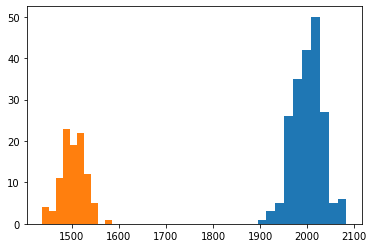

In [37]:
from matplotlib import pyplot as plt

plt.hist(np.append(apple_approved, lenovo_not_approved))
plt.hist(lenovo_approved)

In [38]:
for price in apple_approved:
    r = request_approval("john", "Apple", price)
    uuid = r['id']
    r = list_approvals(uuid, "john")
    tuuid = list(r)[0]
    r = set_approval(uuid, tuuid, True)

In [39]:
for price in lenovo_approved:
    r = request_approval("john", "Lenovo", price)
    uuid = r['id']
    r = list_approvals(uuid, "john")
    tuuid = list(r)[0]
    r = set_approval(uuid, tuuid, True)

In [40]:
for price in lenovo_not_approved:
    r = request_approval("john", "Lenovo", price)
    print(r)
    uuid = r['id']
    r = list_approvals(uuid, "john")
    tuuid = list(r)[0]
    r = set_approval(uuid, tuuid, False)

{'id': '9ee7a128-201d-41c7-a3a0-e7511a6f5761', 'actor': 'john', 'item': 'Lenovo', 'approved': None, 'price': 1954.4496294731753}
{'id': '8f0a5500-c432-4f10-925e-a2a35cf995f9', 'actor': 'john', 'item': 'Lenovo', 'approved': True, 'price': 2012.5325378625082}


JSONDecodeError: Expecting value: line 1 column 1 (char 0)